## Problem Statement 

Typically a house in Manhattan comprises of various electrical appliances. Each of these appliances partly contributes to the total energy consumption of the house. If these houses are grouped based on their power usage, it helps to analyze the requirement of electric power in different parts of the city. Also, the insights can be useful to identify the appliances with high and low usage of electricity. In this case study, we consider the power consumption due to various appliances in the house and try to group the houses as per their power consumption.

##  Data Definition 

The dataset represents the electric power consumption in the house. The data definition is as follows:

**Global_active_power**: The global minute-averaged active power of the house (in KW)

**Global_reactive_power**: The global minute-averaged reactive power of the house (in KW)

**Voltage**: The minute-averaged voltage of the house (in volt)

**Global_intensity**: The global minute-averaged current intensity of the house (in ampere)

**Kitchen_consumption**: The power consumption of the appliances in the kitchen (in watt-hour)

**Laundry_consumption**: The power consumption of the appliances in the laundry room (in watt-hour)

**Other_appliances_consumption**: The power consumption of the appliances other than in the kitchen and laundry room (in watt-hour)

### Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from sklearn.metrics.pairwise import euclidean_distances
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Reading Dataset

In [2]:
df_power = pd.read_excel('power.xlsx')
df_power

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption
0,2.242,0.162,237.33,10.0,1,7,17
1,3.714,0.296,235.15,15.8,2,35,17
2,3.212,0.304,235.99,14.2,1,26,17
3,3.694,0.280,235.16,15.6,1,35,17
4,3.204,0.292,236.08,14.0,1,27,17
...,...,...,...,...,...,...,...
21235,2.812,0.290,239.05,11.8,2,2,17
21236,2.758,0.290,238.61,11.6,1,1,18
21237,2.750,0.286,238.07,11.6,2,1,17
21238,2.918,0.268,237.10,12.4,1,1,18


### Datatypes

In [3]:
df_power.dtypes

Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Kitchen_consumption               int64
Laundry_consumption               int64
Other_appliances_consumption      int64
dtype: object

### Null Values

In [4]:
df_power.isnull().sum()

Global_active_power             0
Global_reactive_power           0
Voltage                         0
Global_intensity                0
Kitchen_consumption             0
Laundry_consumption             0
Other_appliances_consumption    0
dtype: int64

### Distribution

In [5]:
cols=df_power.columns

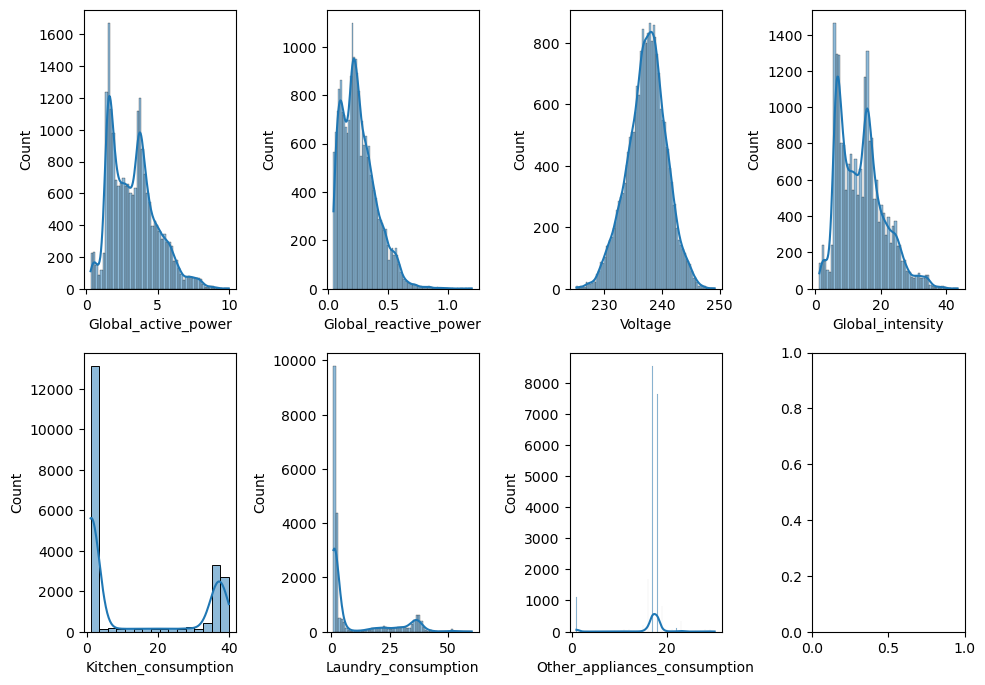

In [9]:
fig, ax= plt.subplots(2,4, figsize=(10,7))
for i, subplot in zip(cols, ax.flatten()):
    sns.histplot(df_power[i], ax=subplot,kde=True)
plt.tight_layout()
plt.show()

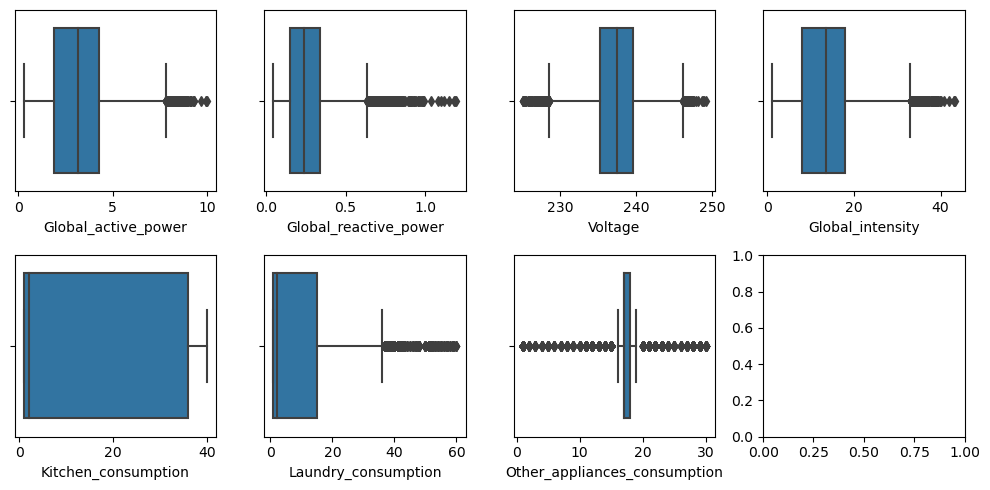

In [13]:
fig, ax= plt.subplots(2,4, figsize=(10,5))
for i, subplot in zip(cols, ax.flatten()):
    sns.boxplot(x = df_power[i], ax=subplot)
plt.tight_layout()
plt.show()

In [ ]:
# No Extreme Outliers

In [14]:
df_power.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption
Global_active_power,1.000000,0.122864,-0.523488,0.998922,0.598839,0.579679,-0.017228
Global_reactive_power,0.122864,1.000000,-0.068891,0.136242,0.092223,-0.031474,-0.051425
Voltage,-0.523488,-0.068891,1.000000,-0.543971,-0.328889,-0.272882,0.079418
Global_intensity,0.998922,0.136242,-0.543971,1.000000,0.596695,0.580929,-0.021658
Kitchen_consumption,0.598839,0.092223,-0.328889,0.596695,1.000000,-0.019933,-0.191895
Laundry_consumption,0.579679,-0.031474,-0.272882,0.580929,-0.019933,1.000000,-0.074057
Other_appliances_consumption,-0.017228,-0.051425,0.079418,-0.021658,-0.191895,-0.074057,1.000000


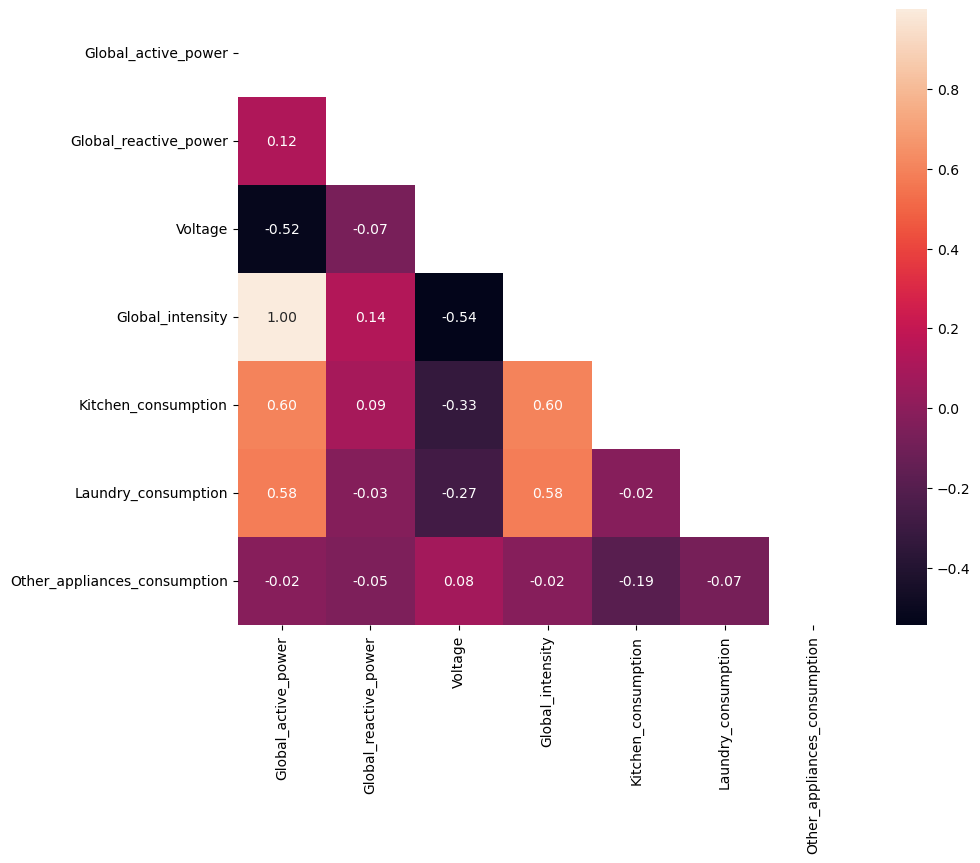

In [17]:
mask = np.triu(np.ones_like(df_power.corr()))
fig = plt.subplots(figsize=(10,8))
sns.heatmap(df_power.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

In [ ]:
# High Multicollinearity exists between 'Global_active_power' and 'Global_intensity'

### PCA

In [19]:
sc = StandardScaler()
df_scaled = pd.DataFrame(sc.fit_transform(df_power), columns = df_power.columns)
df_scaled

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption
0,-0.645095,-0.673126,0.001465,-0.576969,-0.754271,-0.165925,0.083161
1,0.260541,0.252945,-0.636716,0.255308,-0.693563,1.883736,0.083161
2,-0.048310,0.308233,-0.390812,0.025714,-0.754271,1.224917,0.083161
3,0.248236,0.142369,-0.633789,0.226609,-0.754271,1.883736,0.083161
4,-0.053232,0.225301,-0.364465,-0.002985,-0.754271,1.298119,0.083161
...,...,...,...,...,...,...,...
21235,-0.294407,0.211479,0.504984,-0.318676,-0.693563,-0.531936,0.083161
21236,-0.327630,0.211479,0.376177,-0.347375,-0.754271,-0.605138,0.323773
21237,-0.332552,0.183835,0.218095,-0.347375,-0.693563,-0.605138,0.083161
21238,-0.229192,0.059438,-0.065866,-0.232578,-0.754271,-0.605138,0.323773


In [20]:
pca = PCA(random_state= 10)
df_pca = pd.DataFrame(pca.fit_transform(df_scaled))
df_pca

,0,1,2,3,4,5,6
0,-1.067477,-0.532983,-0.407351,-0.111041,0.442326,0.076597,0.046378
1,0.922166,-1.236260,-0.174417,1.332453,0.397879,-0.543565,-0.022590
2,0.295110,-0.864841,-0.027505,1.107541,0.386370,-0.337571,0.036333
3,0.866390,-1.313918,-0.246008,1.296131,0.418119,-0.515567,-0.033380
4,0.284213,-0.939421,-0.097359,1.096489,0.355774,-0.381237,0.020434
...,...,...,...,...,...,...,...
21235,-0.946356,0.038911,0.277882,0.237341,-0.079002,0.470977,-0.012247
21236,-0.995878,-0.071815,0.466236,0.136076,0.078982,0.463673,-0.011619
21237,-0.902515,0.075620,0.266611,0.162855,0.206436,0.454049,-0.011338
21238,-0.727290,-0.150238,0.378824,-0.000697,0.445753,0.510563,-0.006135


### Scree Plot

Text(0, 0.5, 'Explained Variance')

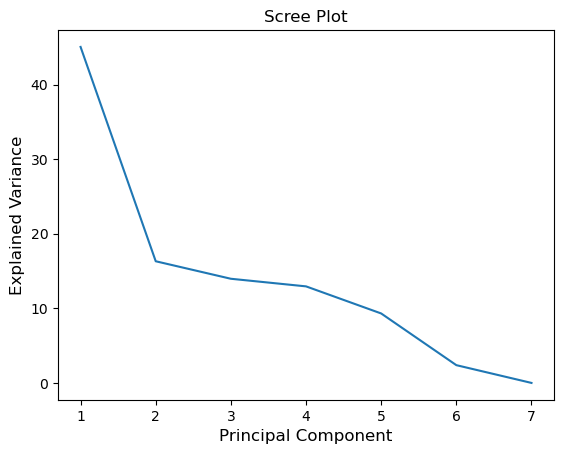

In [21]:
evr = pca.explained_variance_ratio_*100
evrcs = np.cumsum(evr)*100
sns.lineplot(x = range(1,8), y = evr)
plt.title('Scree Plot', fontsize=12)
plt.xlabel("Principal Component", fontsize=12)
plt.ylabel("Explained Variance", fontsize=12)

### Business Rule

In [22]:
eig_val = pca.explained_variance_
var_exp = [(i/7)*100 for i in sorted(eig_val, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 45.04560285,  61.36304117,  75.33339001,  88.28417029,
        97.60383271,  99.9949953 , 100.00470832])

In [ ]:
# Business Rule indicating to use 4 PCs as they explain 80% of the variance

In [23]:
pca = PCA(n_components= 0.8, random_state= 10)
df_pca = pd.DataFrame(pca.fit_transform(df_scaled))
df_pca

,0,1,2,3
0,-1.067477,-0.532983,-0.407351,-0.111041
1,0.922166,-1.236260,-0.174417,1.332453
2,0.295110,-0.864841,-0.027505,1.107541
3,0.866390,-1.313918,-0.246008,1.296131
4,0.284213,-0.939421,-0.097359,1.096489
...,...,...,...,...
21235,-0.946356,0.038911,0.277882,0.237341
21236,-0.995878,-0.071815,0.466236,0.136076
21237,-0.902515,0.075620,0.266611,0.162855
21238,-0.727290,-0.150238,0.378824,-0.000697


In [24]:
df_pca = df_pca.rename(columns={0:'PC1',1:'PC2',2:'PC3',  3:'PC4'})

<Axes: >

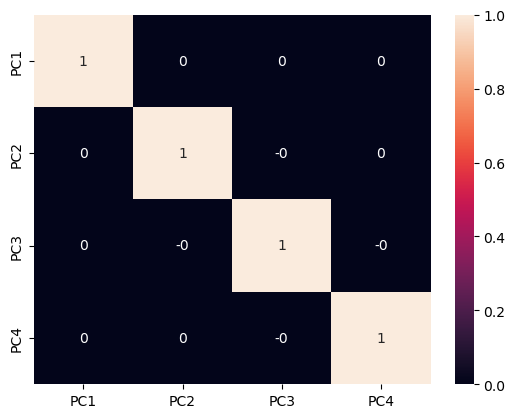

In [25]:
sns.heatmap(np.round(df_pca.corr()), annot= True)

In [ ]:
# There is no Multicollinearity

### PCA Coefficients

In [26]:
df_pca_laoding=pd.DataFrame(pca.components_, columns=list(df_scaled))
df_pca_laoding

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption
0,0.544433,0.090157,-0.375260,0.547238,0.367394,0.339496,-0.070279
1,-0.084480,0.473585,-0.024516,-0.077867,0.469337,-0.509681,-0.530908
2,0.070846,0.621415,0.019338,0.075297,-0.001620,-0.222929,0.743694
3,-0.040914,0.611883,0.082018,-0.030130,-0.489718,0.498155,-0.358202


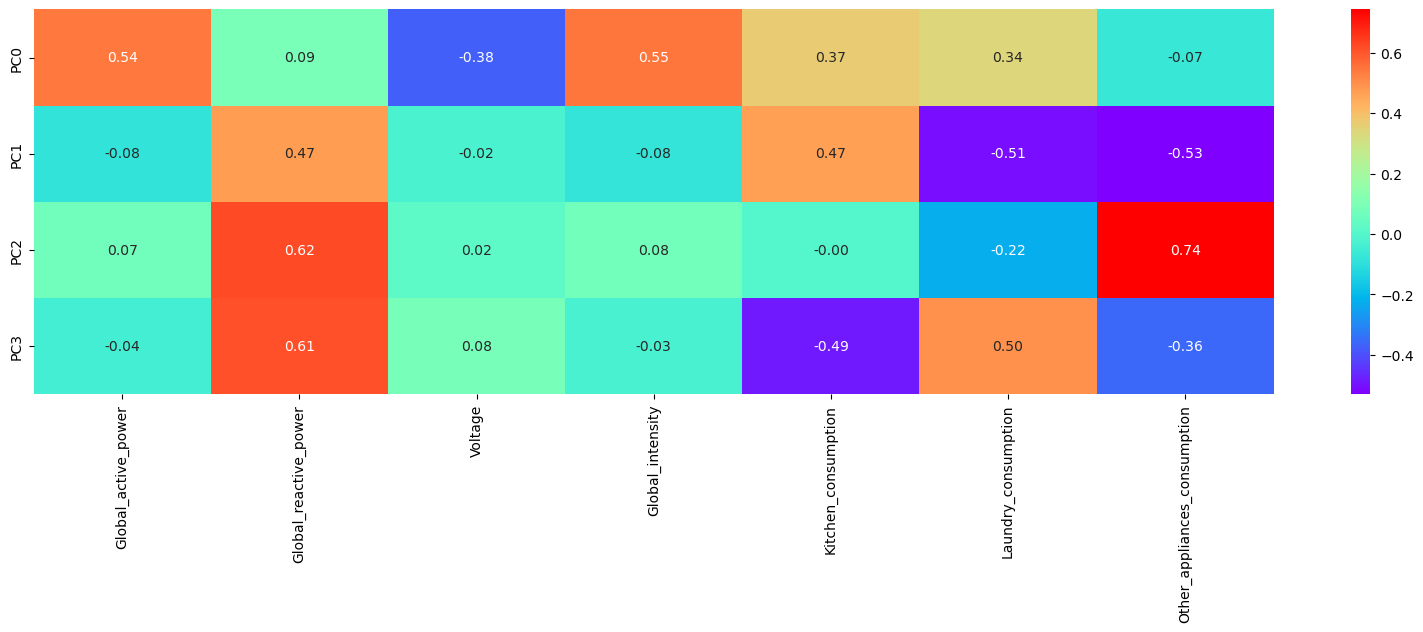

In [27]:
plt.figure(figsize=(20,5))
sns.heatmap(df_pca_laoding, cmap='rainbow', annot=True, fmt='.2f', yticklabels=['PC0','PC1','PC2','PC3'])
plt.show()

### KMeans Clustering

In [31]:
wcss = []
for i in range(2,11):
    km = KMeans(n_clusters=i)
    km.fit(df_scaled)
    wcss.append(km.inertia_)

In [32]:
clusters_df = pd.DataFrame({'num_clusters': range(2,11), 'Inertia': wcss})
clusters_df

,num_clusters,Inertia
0,2,101291.644640
1,3,81467.273165
2,4,66427.243107
3,5,60115.556584
4,6,51940.100362
5,7,47725.593740
6,8,46333.650512
7,9,41960.418207
8,10,39785.421418


### Elbow Plot

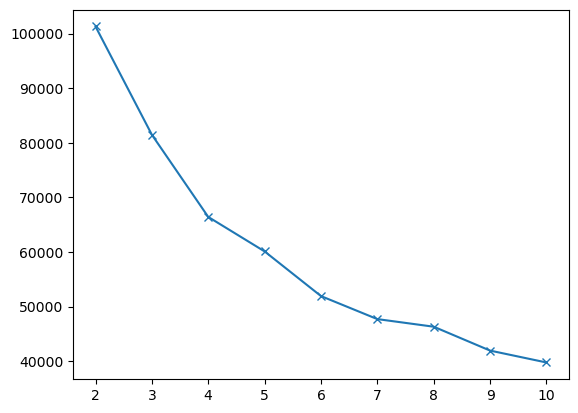

In [33]:
plt.plot(clusters_df['num_clusters'],clusters_df['Inertia'], marker = 'x')

### Silhoutte Score

In [34]:
n_clusters = [2,3,4,5,6,7,8,9,10]
sil_score = []
for K in n_clusters:
    kmns = KMeans(n_clusters = K, random_state= 10)
    kmns.fit(df_scaled)
    label = kmns.labels_
    score = silhouette_score(df_scaled, label, random_state= 10)
    sil_score.append(score)
    print('For {} clusters the silhoutte score is {}'.format(K, score))

For 2 clusters the silhoutte score is 0.31894146330596895
For 3 clusters the silhoutte score is 0.34352498783709823
For 4 clusters the silhoutte score is 0.34848228139078485
For 5 clusters the silhoutte score is 0.38053509067358093
For 6 clusters the silhoutte score is 0.37835385983417075
For 7 clusters the silhoutte score is 0.2990251763577273
For 8 clusters the silhoutte score is 0.2746467933010457
For 9 clusters the silhoutte score is 0.2668463013564244
For 10 clusters the silhoutte score is 0.266431619702439


In [ ]:
# Silhoutte score is highest for 5 clusters

In [35]:
km = KMeans(n_clusters = 5)
km.fit(df_scaled)
df_power['Labels']=km.labels_
df_power.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_consumption,Laundry_consumption,Other_appliances_consumption,Labels
0,2.242,0.162,237.33,10.0,1,7,17,2
1,3.714,0.296,235.15,15.8,2,35,17,0
2,3.212,0.304,235.99,14.2,1,26,17,4
3,3.694,0.280,235.16,15.6,1,35,17,0
4,3.204,0.292,236.08,14.0,1,27,17,4


<Axes: xlabel='Labels', ylabel='count'>

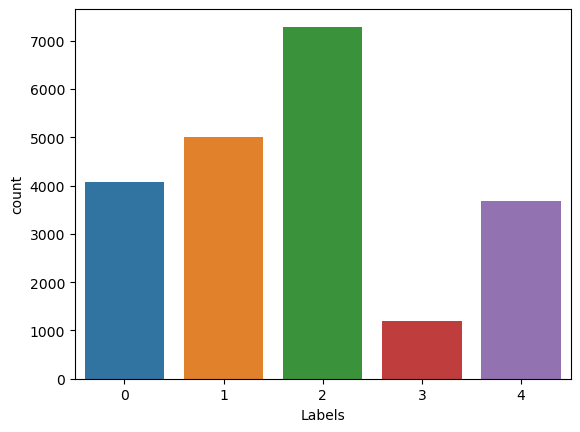

In [38]:
sns.countplot(x = df_power['Labels'])

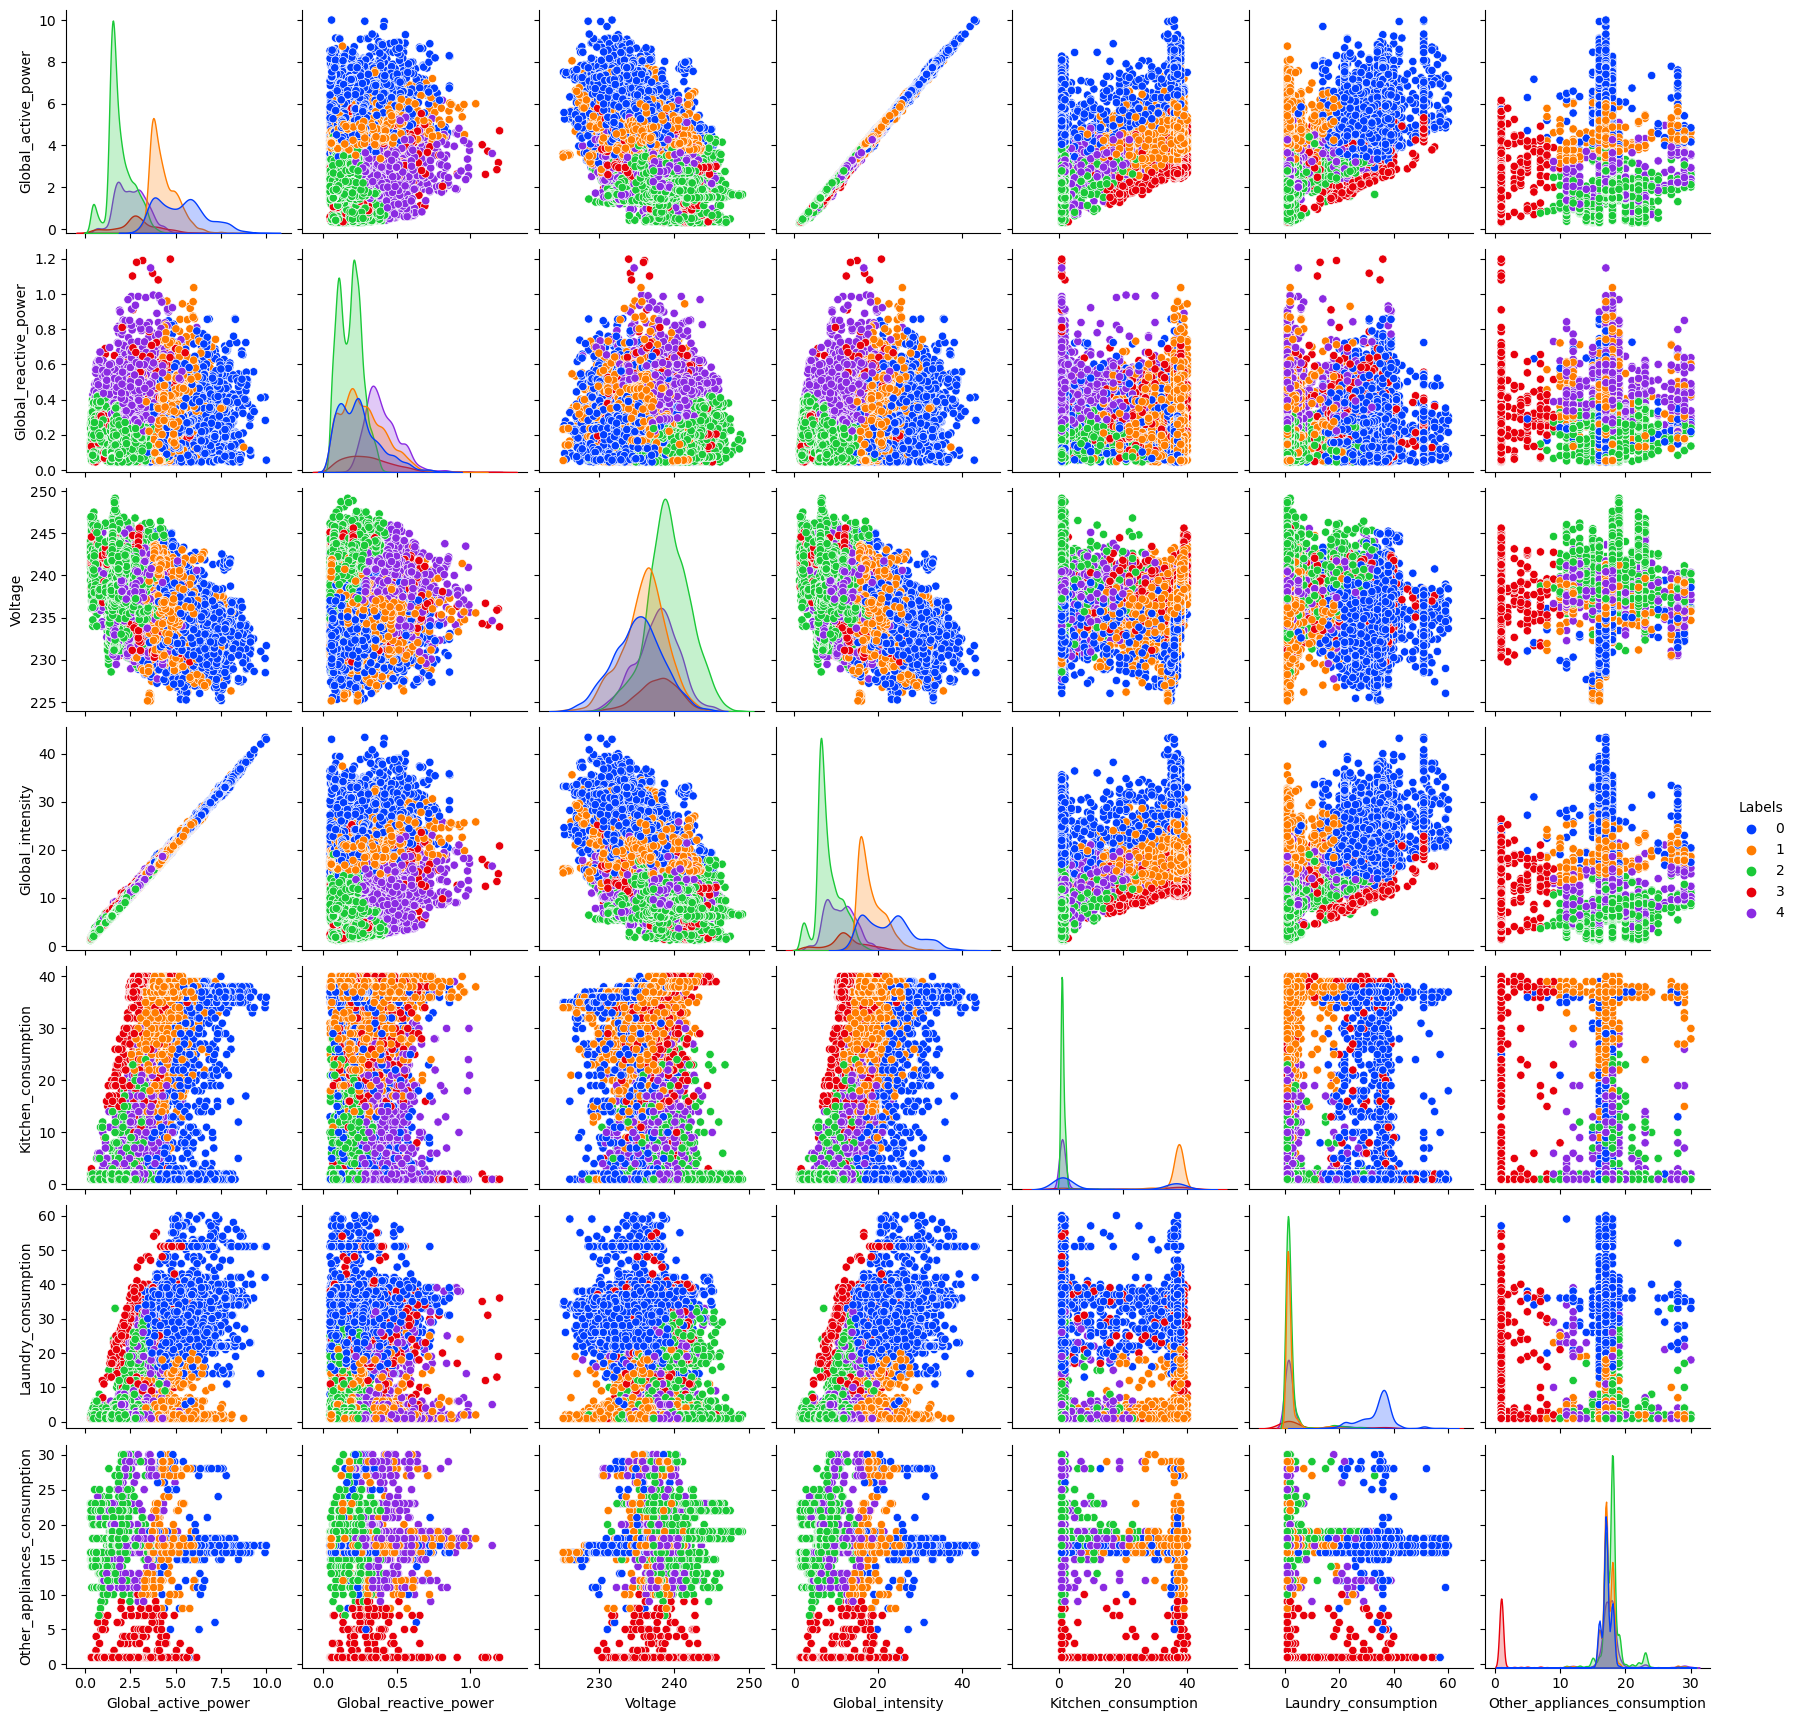

In [37]:
sns.pairplot(df_power, hue = 'Labels', diag_kind= 'kde',  palette= sns.color_palette('bright'))

### Heirarchical Clustering

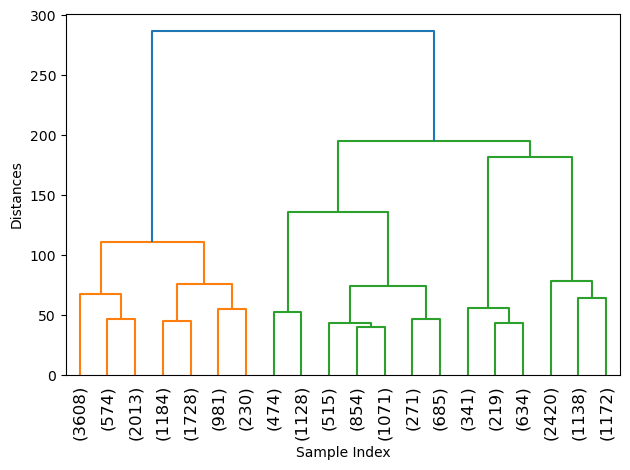

In [42]:
zlink = linkage(df_scaled, 'ward')
dendrogram(zlink, truncate_mode= 'lastp', p= 20)
plt.xlabel('Sample Index')
plt.ylabel('Distances')
plt.xticks(rotation = 90)
plt.tight_layout()

In [44]:
n_clusters = [2,3,4,5,6,7,8,9,10]
sil_score = []
for K in n_clusters:
    agg = AgglomerativeClustering(n_clusters = K)
    agg.fit(df_scaled)
    label = agg.labels_
    score = silhouette_score(df_scaled, label, random_state= 10)
    sil_score.append(score)
    print('For {} clusters the silhoutte score is {}'.format(K, score))

For 2 clusters the silhoutte score is 0.2812829303099928
For 3 clusters the silhoutte score is 0.31917972932467803
For 4 clusters the silhoutte score is 0.3384814236818975
For 5 clusters the silhoutte score is 0.3576782618261185
For 6 clusters the silhoutte score is 0.26442403785334856
For 7 clusters the silhoutte score is 0.23585144478817865
For 8 clusters the silhoutte score is 0.23406542047569412
For 9 clusters the silhoutte score is 0.23119848115947517
For 10 clusters the silhoutte score is 0.20010624450393671


In [ ]:
# Silhoutte scores are better for K Means Clustering

In [46]:
df_power[df_power['Labels'] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
Global_active_power,4068.0,5.298608,1.363699,2.634,4.094,5.258,6.1685,9.994
Global_reactive_power,4068.0,0.244939,0.144149,0.046,0.130,0.224,0.3220,0.860
Voltage,4068.0,235.099685,3.341512,225.170,232.830,235.190,237.2900,245.250
Global_intensity,4068.0,22.650197,5.931660,11.600,17.400,22.600,26.4000,43.400
Kitchen_consumption,4068.0,13.914700,16.385954,1.000,1.000,2.000,36.0000,40.000
Laundry_consumption,4068.0,33.916175,6.747700,5.000,30.000,35.000,37.0000,60.000
Other_appliances_consumption,4068.0,17.092183,1.446567,1.000,17.000,17.000,18.0000,30.000
Labels,4068.0,0.000000,0.000000,0.000,0.000,0.000,0.0000,0.000


In [47]:
df_power[df_power['Labels'] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
Global_active_power,5010.0,4.324762,0.752383,2.556,3.7600,4.122,4.7975,8.746
Global_reactive_power,5010.0,0.271789,0.148184,0.046,0.1620,0.252,0.3680,1.036
Voltage,5010.0,235.947166,2.980144,225.120,234.1525,236.210,237.8900,245.010
Global_intensity,5010.0,18.388503,3.257486,11.800,15.8000,17.400,20.4000,37.400
Kitchen_consumption,5010.0,35.600399,5.835504,1.000,36.0000,37.000,38.0000,40.000
Laundry_consumption,5010.0,2.312575,3.458983,1.000,1.0000,1.000,2.0000,26.000
Other_appliances_consumption,5010.0,17.311377,1.556050,8.000,17.0000,17.000,18.0000,30.000
Labels,5010.0,1.000000,0.000000,1.000,1.0000,1.000,1.0000,1.000


In [ ]:
# The mean Laundry_consumption is low for class 1

In [48]:
df_power[df_power['Labels'] == 2].describe().T

,count,mean,std,min,25%,50%,75%,max
Global_active_power,7288.0,1.906912,0.711208,0.302,1.486,1.726,2.3340,4.408
Global_reactive_power,7288.0,0.180839,0.077391,0.046,0.112,0.187,0.2360,0.420
Voltage,7288.0,239.238948,2.920902,228.570,237.450,239.170,241.1725,249.150
Global_intensity,7288.0,8.038529,3.005267,1.200,6.200,7.200,9.8000,19.000
Kitchen_consumption,7288.0,1.603869,2.428259,1.000,1.000,1.000,1.0000,28.000
Laundry_consumption,7288.0,2.771954,4.871605,1.000,1.000,1.000,2.0000,34.000
Other_appliances_consumption,7288.0,17.897366,1.782277,7.000,17.000,18.000,18.0000,30.000
Labels,7288.0,2.000000,0.000000,2.000,2.000,2.000,2.0000,2.000


In [ ]:
# The mean Kitchen_consumption and Laundry_consumption is low for class 2

In [49]:
df_power[df_power['Labels'] == 3].describe().T

,count,mean,std,min,25%,50%,75%,max
Global_active_power,1197.0,2.843175,1.135339,0.334,2.316,2.808,3.486,6.152
Global_reactive_power,1197.0,0.299529,0.162830,0.046,0.176,0.278,0.400,1.198
Voltage,1197.0,237.845840,2.662107,229.760,236.120,238.000,239.670,245.610
Global_intensity,1197.0,12.190309,4.765109,1.400,10.200,12.000,14.800,26.400
Kitchen_consumption,1197.0,23.854637,16.872944,1.000,1.000,36.000,38.000,40.000
Laundry_consumption,1197.0,10.384294,14.395780,1.000,1.000,2.000,20.000,55.000
Other_appliances_consumption,1197.0,1.295739,1.218348,1.000,1.000,1.000,1.000,10.000
Labels,1197.0,3.000000,0.000000,3.000,3.000,3.000,3.000,3.000


In [ ]:
# The mean Other_appliances_consumption is low for class 3

In [50]:
df_power[df_power['Labels'] == 4].describe().T

,count,mean,std,min,25%,50%,75%,max
Global_active_power,3677.0,2.547741,0.825250,0.436,1.882,2.498,3.128,6.160
Global_reactive_power,3677.0,0.401164,0.119431,0.150,0.318,0.378,0.468,1.148
Voltage,3677.0,237.701167,2.861660,227.740,235.900,237.870,239.630,246.050
Global_intensity,3677.0,10.975741,3.493604,2.600,8.200,10.800,13.400,25.800
Kitchen_consumption,3677.0,2.700843,4.693400,1.000,1.000,1.000,2.000,39.000
Laundry_consumption,3677.0,3.980147,6.843970,1.000,1.000,1.000,2.000,39.000
Other_appliances_consumption,3677.0,17.810987,2.322926,9.000,17.000,18.000,18.000,30.000
Labels,3677.0,4.000000,0.000000,4.000,4.000,4.000,4.000,4.000
